# Import Packages

In [ ]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd
import zipfile
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator 
from keras import backend
import cv2 
from keras import applications


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

print("Cats&Dogs Dataset Folder Contain:",os.listdir("../input"))
        
        
%matplotlib inline

# Load Data
As we see train and test both are zip file.So we have to unzip them and extract there data 

In [ ]:
# Extract data because we have data in zip file
with zipfile.ZipFile("/kaggle/input/dogs-vs-cats/train.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("/kaggle/input/dogs-vs-cats/test1.zip","r") as z:
    z.extractall(".")
    

In [ ]:
# lets check our data extracted or not
#print(os.listdir("/kaggle/working/test1"))
#print(os.listdir("/kaggle/working/train"))


In [ ]:
main = "/kaggle/working"
train = "train"
train = os.path.join(main,train)

test = "test1"
test = os.path.join(main,test)


IMAGE_FOLDER_PATH="../working/train"
FILE_NAMES=os.listdir(IMAGE_FOLDER_PATH)
WIDTH=150
HEIGHT=150

In [ ]:

# random choose a single image from train dataset
for p in os.listdir(train):
    category = p.split(".")[0]
    image_read = cv2.imread(os.path.join(train,p),cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(image_read,dsize=(240,240))
    plt.imshow(img,cmap="gray")
    break

In [ ]:
from matplotlib.image import imread
# create a grid of 3x3 images
for i in range(9):
    plt.subplot(331+i)
    filename=train+'/cat.'+str(i)+'.jpg'
    image=imread(filename)
    plt.imshow(image)
plt.show()    

In [ ]:
# create a grid of 3x3 images
for i in range(9):
    plt.subplot(331+i)
    filename=train+'/dog.'+str(i)+'.jpg'
    image=imread(filename)
    plt.imshow(image)
plt.show()  

In [ ]:
# create dataset
targets=list()
full_paths=list()
for file_name in FILE_NAMES:
    target=file_name.split(".")[0]
    full_path=os.path.join(IMAGE_FOLDER_PATH, file_name)
    full_paths.append(full_path)
    targets.append(target)

dataset=pd.DataFrame()
dataset['image_path']=full_paths
dataset['target']=targets

        


In [ ]:
dataset.head(10)

In [ ]:
# count of dogs and cats
target_counts=dataset['target'].value_counts()
print("Number of dogs in the dataset:{}".format(target_counts['dog']))
print("Number of cats in the dataset:{}".format(target_counts['cat']))

In [ ]:
# lets check our train data
sns.countplot(y='target',data=dataset)
dataset['target'].value_counts()    # we have equal images of both cat and Dog

In [ ]:

def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validatin Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history["Validatin Accuracy"]=modelHistory.history['val_accuracy']
  
    history.plot(figsize=(12,8))
    plt.title(" Convulutional Model {} Train and Validation Loss and Accuracy History".format(model_name))
    plt.show()

In [ ]:
# Dataset split
dataset_train, dataset_test=train_test_split(dataset,
                                                 test_size=0.2,
                                                 random_state=42)

# Data Augmentation

In [ ]:
train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1)

train_datagenerator=train_datagen.flow_from_dataframe(dataframe=dataset_train,
                                                     x_col="image_path",
                                                     y_col="target",
                                                     target_size=(WIDTH, HEIGHT),
                                                     class_mode="binary",
                                                     batch_size=150)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_datagenerator=test_datagen.flow_from_dataframe(dataframe=dataset_test,
                                                   x_col="image_path",
                                                   y_col="target",
                                                   target_size=(WIDTH, HEIGHT),
                                                   class_mode="binary",
                                                   batch_size=150)

# Build Model

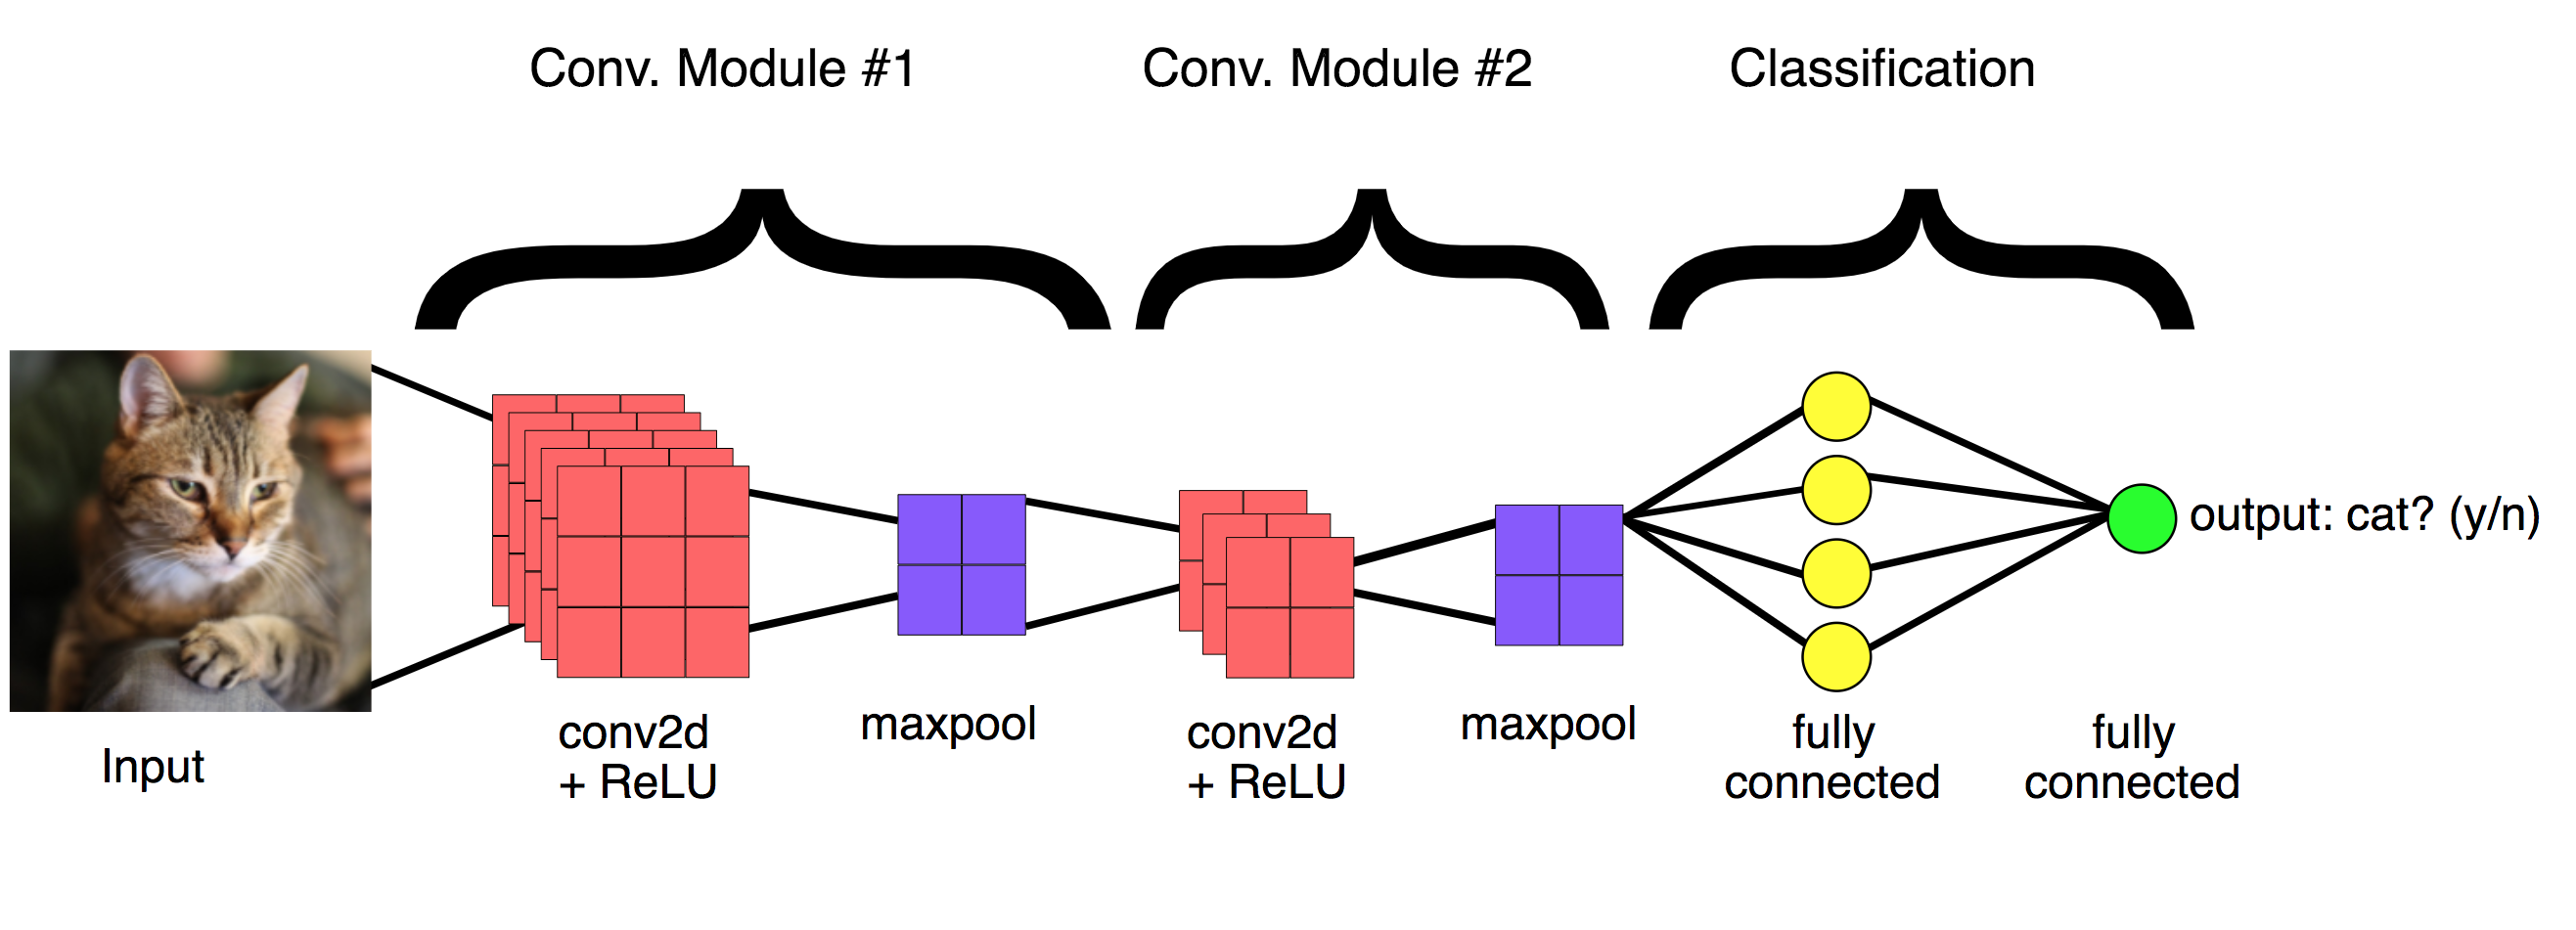

In [ ]:
# CNN
model=Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(WIDTH, HEIGHT, 3)))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

In [ ]:
model.compile(loss="binary_crossentropy", 
             optimizer=RMSprop(lr=1e-4),
             metrics=["accuracy"])
print("[INFO]: model compiled...")

- Early stopping: if there is no change in model the neural network will stop after patience() steps for preventing Overfitting.

- Learning Rate reduction : it will reduce the learning rate when then accuracy not increase for 2 steps.

In [ ]:
#from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=6)

#learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

#callbacks = [earlystop]

In [ ]:
modelHistory=model.fit_generator(train_datagenerator,
                                epochs=50,
                                validation_data=test_datagenerator,
                                validation_steps=dataset_test.shape[0]//150,
                                steps_per_epoch=dataset_train.shape[0]//150
                                )


In [ ]:
print("Train Accuracy:{:.3f}".format(modelHistory.history['accuracy'][-1]))
print("Test Accuracy:{:.3f}".format(modelHistory.history['val_accuracy'][-1]))
show_model_history(modelHistory=modelHistory, model_name="")

# Feature Extraction
**We will extract feature using Inceptionv3(It is a Transfer Learning Method)**

In [ ]:
model=applications.InceptionV3(weights="imagenet", include_top=False, input_shape=(WIDTH, HEIGHT, 3))
model.summary()

In [ ]:
counter=0
features=list()
for path, target in zip(full_paths, targets):
    img=load_img(path, target_size=(WIDTH, HEIGHT))
    img=img_to_array(img)
    img=np.expand_dims(img, axis=0)
    feature=model.predict(img)
    features.append(feature)
    counter+=1
    if counter%2500==0:
        print("[INFO]:{} images loaded".format(counter))

In [ ]:
features=np.array(features)
print("Before reshape,features.shape:",features.shape)
features=features.reshape(features.shape[0], 3*3*2048)
print("After reshape, features.shape:",features.shape)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=le.fit_transform(targets)

In [ ]:
print("features.shape:",features.shape)
print("targets.shape:",targets.shape)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(features, targets, test_size=0.2, random_state=42)

In [ ]:
clf=LogisticRegression(solver="lbfgs")
print("{} training...".format(clf.__class__.__name__))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("The model trained and used to predict the test data...")

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n",metrics.classification_report(y_test, y_pred, target_names=["cat", "dog"]))

# Cross_validation
**If you want to check cross val score just uncomment next cell then you will get your cross val score**

In [ ]:
#from sklearn.model_selection import cross_val_score
#cv_scores=cross_val_score(LogisticRegression(solver="lbfgs"), features, targets, cv=3 )
#print("Cross validation scores obtained...")
#print("Cross validated scores:{}".format(cv_scores))
#print("Mean of cross validated scores:{:.3f}".format(cv_scores.mean()))